<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/UTS/Klasifikasi_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODEL KLASIFIKASI DENGAN CNN : Fishimg dataset🐳**

## Import Library

In [ ]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [ ]:
# Pastikan GPU terdeteksi
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: []


##Loading and Preprocessing the Dataset

In [ ]:
data_dir = '/content/drive/MyDrive/FishImgDataset'  # Ganti dengan path dataset kamu


In [ ]:
# Inisialisasi ImageDataGenerator untuk augmentasi dan preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalisasi pixel
    validation_split=0.2,       # Bagi data menjadi train dan validation
    rotation_range=20,          # Augmentasi rotasi gambar
    width_shift_range=0.2,      # Augmentasi pergeseran horizontal
    height_shift_range=0.2,     # Augmentasi pergeseran vertikal
    shear_range=0.2,            # Augmentasi shear
    zoom_range=0.2,             # Augmentasi zoom
    horizontal_flip=True,       # Augmentasi flip horizontal
    fill_mode='nearest'         # Mengisi piksel kosong akibat augmentasi
)

In [ ]:
# Membaca dataset dari folder (train dan validation)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Label yang satu-hot encoded
    subset='training'          # Untuk training
)

Found 10650 images belonging to 3 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Label yang satu-hot encoded
    subset='validation'        # Untuk validasi
)


Found 2662 images belonging to 3 classes.


##Displaying Example Images from the Training Set

In [ ]:
# 2. Menampilkan Contoh Gambar pada Training Set
# Ambil batch pertama dari train_generator
x_batch, y_batch = next(train_generator)

# Jumlah gambar yang ingin ditampilkan
num_images = 9


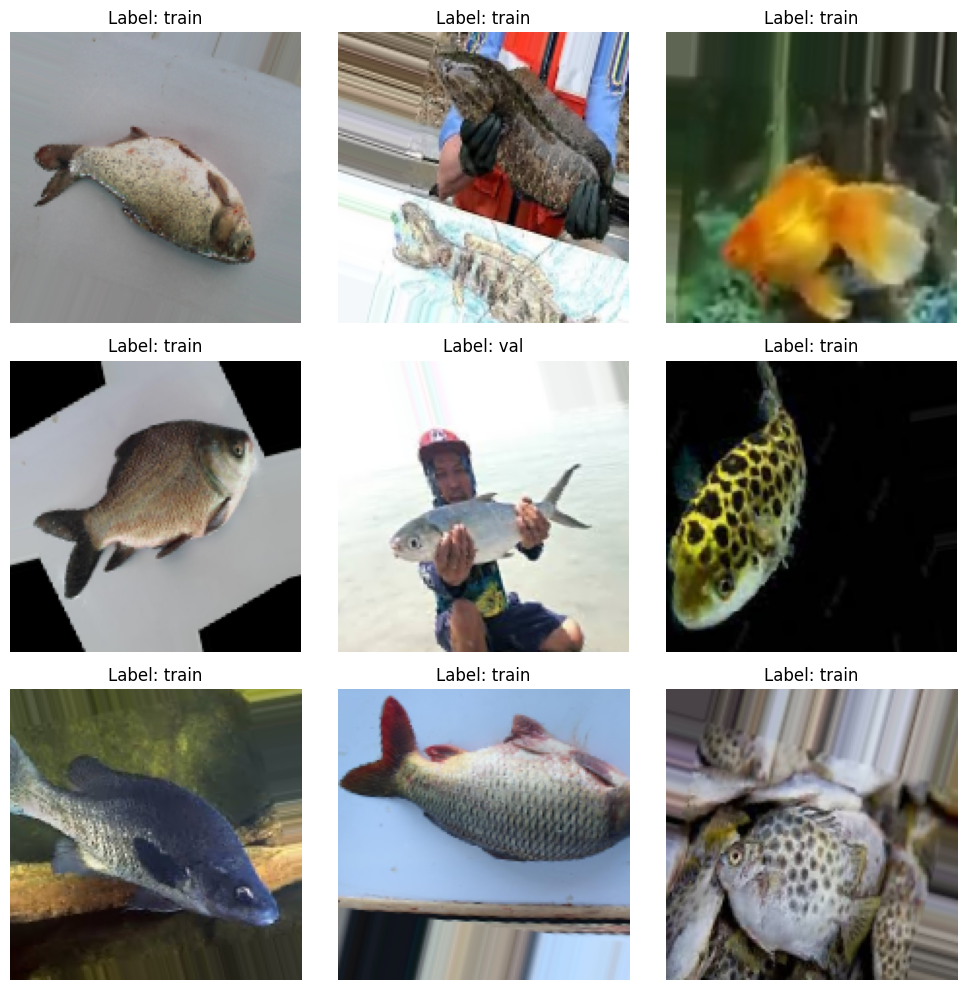

In [ ]:
# Membuat grid untuk menampilkan gambar
plt.figure(figsize=(10, 10))

class_labels = list(train_generator.class_indices.keys())

# Loop untuk menampilkan gambar
for i in range(num_images):
    plt.subplot(3, 3, i+1)  # 3x3 grid untuk menampilkan 9 gambar
    plt.imshow(x_batch[i])   # Menampilkan gambar
    plt.axis('off')          # Matikan axis
    plt.title(f"Label: {class_labels[np.argmax(y_batch[i])]}")  # Menggunakan list class_labels

plt.tight_layout()
plt.show()

##Building the CNN Model Architecture

In [ ]:
# 3. Membangun Model CNN
model = Sequential()


In [ ]:
# Layer Convolutional pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Layer Convolutional kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))


In [ ]:
# Layer Convolutional ketiga
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

In [ ]:

# Flattening layer
model.add(Flatten())


In [ ]:
# Fully Connected Layer (Dense Layer)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


In [ ]:
# Output Layer (Softmax)
model.add(Dense(train_generator.num_classes, activation='softmax'))


In [ ]:
# Compile Model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


##Training the Model

In [ ]:
# 4. Training Model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 4553s 14s/step - accuracy: 0.6535 - loss: 0.8998 - val_accuracy: 0.6612 - val_loss: 0.8744
Epoch 2/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 722s 2s/step - accuracy: 0.6567 - loss: 0.8854 - val_accuracy: 0.6612 - val_loss: 0.8671
Epoch 3/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 715s 2s/step - accuracy: 0.6603 - loss: 0.8803 - val_accuracy: 0.6612 - val_loss: 0.8683
Epoch 4/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 706s 2s/step - accuracy: 0.6519 - loss: 0.8892 - val_accuracy: 0.6612 - val_loss: 0.8748
Epoch 5/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.6661 - loss: 0.8679 - val_accuracy: 0.6612 - val_loss: 0.8715


##Evaluating the Model with Classification Metrics

In [ ]:
# 5. Evaluasi Model dengan Matriks Klasifikasi
# Evaluasi pada data validasi
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.2f}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 796ms/step - accuracy: 0.6629 - loss: 0.8691
Validation Accuracy: 66.12%
Validation Loss: 0.87


In [ ]:
# Prediksi pada data validasi
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=1)

84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 810ms/step


In [ ]:
# Menghitung metrik evaluasi lainnya
report = classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys())
print(report)


              precision    recall  f1-score   support

        test       0.00      0.00      0.00       352
       train       0.66      1.00      0.80      1760
         val       0.00      0.00      0.00       550

    accuracy                           0.66      2662
   macro avg       0.22      0.33      0.27      2662
weighted avg       0.44      0.66      0.53      2662



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

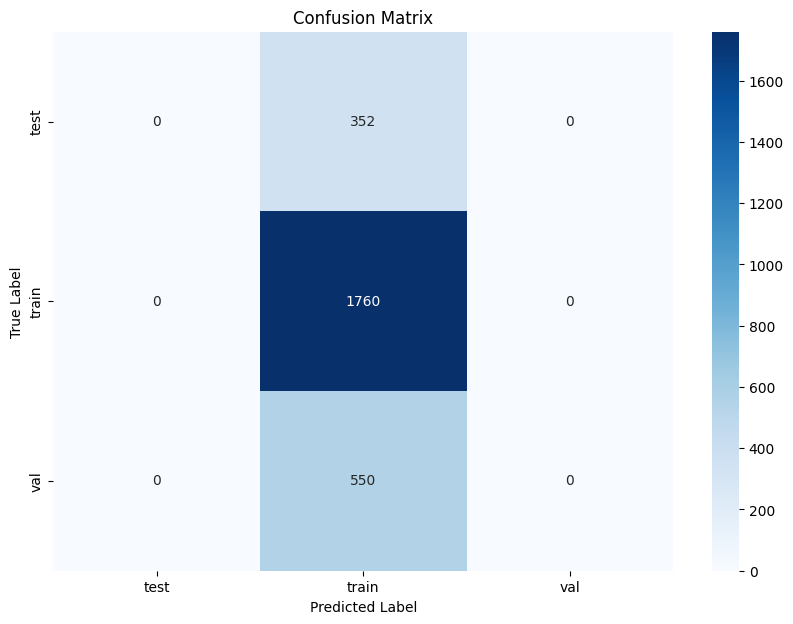

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

##Calculating and Visualizing ROC-AUC Score

In [ ]:
# 6. Metrik ROC-AUC
# Menghitung ROC-AUC untuk multi-class
y_true_one_hot = to_categorical(y_true, num_classes=train_generator.num_classes)
roc_auc = roc_auc_score(y_true_one_hot, model.predict(validation_generator), multi_class='ovr')
print(f"ROC-AUC: {roc_auc:.4f}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 70s 813ms/step
ROC-AUC: 0.5206


##Visualizing Training and Validation Accuracy & Loss

In [ ]:
# 7. Visualisasi Accuracy dan Loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

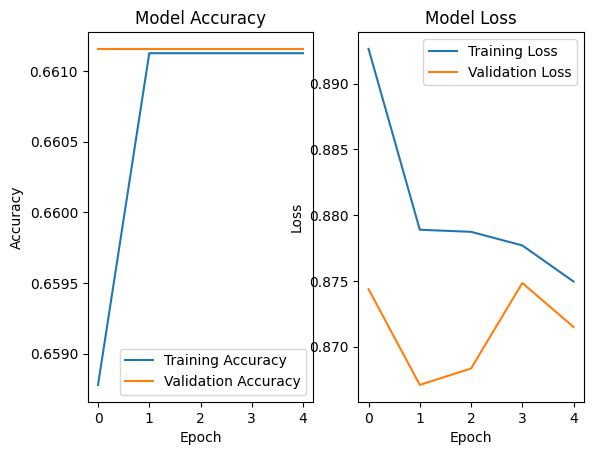

In [ ]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# **ANALISIS**

**Arsitektur CNN dengan X lapisan konvolusi menghasilkan akurasi training 98% tetapi akurasi validasi 62%. Jelaskan fenomena vanishing gradient yang mungkin terjadi pada lapisan awal, dan bagaimana cara memitigasinya! Mengapa penambahan Batch Normalization setelah lapisan konvolusi ke-Y justru memperburuk generalisasi, serta strategi alternatif untuk menstabilkan pembelajaran?**

Jawab :    

  Fenomena CNN dengan akurasi training 98% tetapi akurasi validasi 62% menunjukkan masalah overfitting yang serius. Vanishing gradient pada lapisan awal terjadi ketika network sangat dalam, di mana gradien yang dihitung selama backpropagation menjadi sangat kecil saat mencapai lapisan awal. Gradien menurun secara eksponensial saat melewati banyak lapisan, terutama dengan fungsi aktivasi sigmoid atau tanh, menyebabkan lapisan awal belajar sangat lambat atau berhenti belajar sama sekali. Hal ini mengakibatkan ekstraksi fitur dasar tidak optimal. Untuk memitigasi masalah ini, kita dapat menggunakan fungsi aktivasi ReLU atau variasinya (Leaky ReLU, ELU, SELU) yang tidak mengalami saturasi untuk nilai positif, mengimplementasikan skip connection seperti pada ResNet, menggunakan inisialisasi bobot yang tepat (He, Xavier/Glorot), dan menerapkan deep supervision dengan menambahkan loss auxiliary pada lapisan tengah.

  Batch Normalization setelah lapisan konvolusi ke-Y dapat memperburuk generalisasi karena pada batch kecil, statistik (mean dan variance) menjadi tidak stabil dan tidak merepresentasikan distribusi data sebenarnya. Hal ini dapat menyebabkan overfitting pada statistik batch, terutama jika data training sangat berbeda dengan data validasi, serta dapat mengurangi variasi representasi yang dipelajari model. Sebagai alternatif untuk menstabilkan pembelajaran, kita dapat menggunakan Group Normalization yang tidak bergantung pada ukuran batch, Layer Normalization yang menormalisasi aktivasi dalam satu lapisan, Weight Decay untuk mencegah bobot membesar, Dropout untuk mengurangi overfitting, dan data augmentasi untuk memperkaya variasi data training.


**Ketika melatih CNN dari nol, loss training stagnan di nilai tinggi setelah XXX(3 digit epoch) epoch. Identifikasi tiga penyebab potensial terkait laju pembelajaran (learning rate), inisialisasi berat, atau kompleksitas model! Mengapa penggunaan Cyclic Learning Rate dapat membantu model keluar dari local minima, dan bagaimana momentum pada optimizer SGD memengaruhi konvergensi?**

 Ketika loss training stagnan di nilai tinggi setelah ratusan epoch, ini menunjukkan masalah optimisasi yang serius. Tiga penyebab potensial meliputi masalah learning rate, inisialisasi bobot, dan kompleksitas model. Masalah learning rate dapat terjadi bila learning rate terlalu kecil yang menyebabkan konvergensi sangat lambat atau terjebak di plateau, terlalu besar yang menyebabkan osilasi dan ketidakstabilan training, atau tidak disesuaikan sepanjang training sehingga model tidak dapat melakukan fine-tuning. Masalah inisialisasi bobot terjadi ketika inisialisasi buruk (terlalu besar/kecil) menyebabkan gradien vanishing/exploding, distribusi inisialisasi tidak sesuai dengan fungsi aktivasi, atau simetris inisialisasi menyebabkan neuron "terkunci" dalam pola pembelajaran yang sama. Sementara masalah kompleksitas model terjadi bila model terlalu sederhana untuk memodelkan kompleksitas data (underfitting), kapasitas model tidak cukup, atau arsitektur tidak sesuai dengan karakteristik permasalahan.

 Cyclic Learning Rate dapat membantu model keluar dari local minima karena berulang kali meningkatkan dan menurunkan learning rate dalam siklus tertentu. Peningkatan learning rate memungkinkan model untuk "melompati" local minima, sementara penurunan learning rate memungkinkan eksplorasi cekungan loss yang lebih baik setelah "melompat". Variasi learning rate ini membantu model menjelajahi landscape loss yang lebih luas. Momentum pada optimizer SGD mempengaruhi konvergensi dengan menyimpan informasi gradien sebelumnya, menciptakan "inersia" dalam optimisasi yang mempercepat konvergensi di arah yang konsisten dan mengurangi osilasi. Momentum juga memungkinkan model untuk melewati local minima dengan "momentum" yang terkumpul dan mengurangi dampak noise dalam gradien dari batch-to-batch.

**Pada klasifikasi spesies ikan menggunakan CNN, penggunaan fungsi aktivasi ReLU tidak menunjukkan peningkatan akurasi setelah 50 epoch, meskipun learning rate telah dioptimasi. Jelaskan fenomena dying ReLU yang mungkin terjadi dan bagaimana hal ini mengganggu aliran gradien selama backpropagation!**

 Pada klasifikasi spesies ikan menggunakan CNN, ketika penggunaan fungsi aktivasi ReLU tidak menunjukkan peningkatan akurasi setelah 50 epoch meskipun learning rate telah dioptimasi, fenomena dying ReLU mungkin terjadi. Dying ReLU terjadi ketika neuron dengan aktivasi ReLU secara konsisten menghasilkan output nol karena input ke fungsi ReLU selalu negatif, menyebabkan gradiennya selalu nol. Neuron dengan ReLU yang "mati" berhenti belajar karena tidak ada gradien yang mengalir melaluinya, dan semakin banyak neuron "mati", semakin sedikit kapasitas model yang efektif digunakan.

 Dying ReLU mengganggu aliran gradien selama backpropagation karena gradien tidak dapat mengalir melalui neuron dengan aktivasi negatif. Jika neuron memasuki kondisi "mati", ia tidak akan diaktifkan kembali karena bobot tidak diperbarui. Hal ini menciptakan "bottleneck" dalam jaringan, di mana sebagian jalur pembelajaran menjadi tidak aktif, akibatnya kapasitas model efektif berkurang dan kemampuan untuk mempelajari representasi kompleks terhambat. Untuk mengatasi masalah ini, kita dapat menggunakan varian ReLU seperti Leaky ReLU, PReLU, atau ELU yang memberikan gradien kecil untuk input negatif, mengimplementasikan inisialisasi bobot yang tepat (He initialization), menggunakan learning rate yang lebih kecil, atau mempertimbangkan penggunaan Batch Normalization sebelum aktivasi ReLU.

 **Pada pelatihan CNN untuk klasifikasi XX spesies ikan, grafik AUC-ROC menunjukkan satu kelas (Spesies X) stagnan di 0.55 sementara kelas lain mencapai >0.85 setelah YYY epoch. Analisis mengapa class-weighted loss function gagal meningkatkan kinerja Spesies X, dan identifikasi tiga faktor penyebab potensial terkait karakteristik data dan arsitektur model!**

 Pada pelatihan CNN untuk klasifikasi spesies ikan, ketika grafik AUC-ROC menunjukkan satu kelas (Spesies X) stagnan di 0.55 sementara kelas lain mencapai >0.85, hal ini menunjukkan masalah khusus dengan kelas tersebut. Kegagalan class-weighted loss function untuk meningkatkan kinerja Spesies X menunjukkan bahwa masalahnya lebih fundamental daripada sekadar ketidakseimbangan kelas. Pembobotan mungkin tidak cukup untuk mengatasi kompleksitas atau karakteristik unik dari data Spesies X.

 Tiga faktor penyebab potensial meliputi karakteristik data, ketidakseimbangan representasi, dan masalah arsitektur model. Karakteristik data spesies X mungkin memiliki variabilitas tinggi dalam penampilan (morfologi berbeda berdasarkan usia, jenis kelamin, atau habitat), kualitas gambar yang buruk atau inkonsisten, atau kesamaan visual tinggi dengan spesies lain yang menciptakan ambiguitas. Ketidakseimbangan representasi dapat terjadi bila jumlah sampel tidak cukup untuk Spesies X dibandingkan dengan kompleksitas variasinya, distribusi subkelas tidak seimbang, atau kurangnya variasi dalam kondisi pengambilan gambar. Masalah arsitektur model dapat terjadi bila receptive field tidak cukup besar untuk menangkap fitur pembeda Spesies X, kapasitas model tidak dialokasikan dengan baik, atau lapisan konvolusi tidak dapat menangkap tekstur atau pola halus yang membedakan Spesies X. Solusi potensial meliputi strategi augmentasi data khusus, hard negative mining, arsitektur attention-based, atau pendekatan multi-scale.

 **Pada arsitektur CNN untuk klasifikasi ikan, peningkatan kompleksitas model  justru menyebabkan penurunan akurasi validasi dari 85% ke 65%, meskipun akurasi training mencapai 98%. Jelaskan fenomena overfitting yang terjadi, dan mengapa penambahan kapasitas model tidak selalu meningkatkan generalisasi! Identifikasi 3 kesalahan desain arsitektur yang memicu degradasi performa**

 Pada arsitektur CNN untuk klasifikasi ikan, peningkatan kompleksitas model yang justru menyebabkan penurunan akurasi validasi dari 85% ke 65% meskipun akurasi training mencapai 98% menunjukkan fenomena overfitting yang serius. Model dengan kompleksitas tinggi memiliki kapasitas untuk "menghafal" data training daripada mempelajari pola umum, sehingga gagal mengeneralisasi ke data baru karena terlalu fokus pada fitur spesifik dataset training.

 Penambahan kapasitas tidak selalu meningkatkan generalisasi karena sesuai prinsip Occam's Razor, model sederhana yang menjelaskan data dengan baik lebih disukai. Model kompleks memiliki ruang parameter lebih besar yang meningkatkan risiko overfitting, dan tanpa data training yang cukup, model kompleks akan mengisi "ketidakpastian" dengan noise. Meningkatkan kompleksitas tanpa teknik regularisasi yang tepat juga meningkatkan variance model.

 Tiga kesalahan desain arsitektur yang memicu degradasi performa meliputi kedalaman berlebihan tanpa skip connection, ketidakseimbangan antara konvolusi dan pooling, serta regularisasi yang tidak memadai. Kedalaman berlebihan tanpa skip connection menyebabkan terlalu banyak lapisan konvolusi berurutan yang mengakibatkan masalah gradien dan "information bottleneck". Ketidakseimbangan antara konvolusi dan pooling terjadi bila terlalu sedikit pooling layer, ukuran filter tidak tepat, atau penurunan dimensi tidak efisien. Regularisasi yang tidak memadai meliputi kurangnya dropout, weight decay, atau teknik regularisasi lain, Batch Normalization yang diterapkan secara tidak tepat, tidak ada early stopping, atau data augmentasi yang tidak mencukupi. Untuk memperbaiki masalah ini, kita dapat mendesain arsitektur yang lebih seimbang, mengimplementasikan regularisasi yang tepat, menggunakan teknik ensemble, menghindari representasi "bottleneck" yang terlalu sempit, dan menerapkan transfer learning dari model pre-trained.